<main class="card">
<li>
<strong>Number of Hidden Layers</strong>
<ul class="sub">
<li>Shallow (1–2) for tabular/smaller datasets; deeper for images/text.</li>
<li>Avoid overfitting by adding regularization or early stopping.</li>
</ul>
<div class="meta"><span class="dot"></span><span>Also called network depth</span></div>
</li>

<strong>Number of Nodes (per layer)</strong>
<ul class="sub">
<li>Start with powers of 2 (e.g., 32/64/128).</li>
<li>Balance capacity vs. overfitting and training time.</li>
</ul>
</li>


<li>
<strong>Activation Function</strong>
<ul class="sub">
<li><em>Hidden:</em> ReLU, LeakyReLU, GELU.</li>
<li><em>Output:</em> Sigmoid (binary), Softmax (multiclass), Linear (regression).</li>
</ul>
</li>


<li>
<strong>Loss Function</strong>
<ul class="sub">
<li>Binary cross-entropy, categorical cross-entropy, or MSE/MAE for regression.</li>
<li>Match the loss to your task and activation.</li>
</ul>
</li>


<li>
<strong>Optimizer</strong>
<ul class="sub">
<li>Adam/AdamW for strong defaults; SGD+Momentum for fine control.</li>
<li>Try scheduling (cosine/step) with warmup for larger models.</li>
</ul>
</li>


<li>
<strong>Batch Size</strong>
<ul class="sub">
<li>Common: 16–256 depending on memory.</li>
<li>Smaller batches may generalize better; larger speed up training.</li>
</ul>
</li>


<li>
<strong>Number of Epochs</strong>
<ul class="sub">
<li>Use early stopping on validation loss/metric.</li>
<li>Watch for divergence or overfitting curves.</li>
</ul>
</li>


<li>
<strong>Learning Rate</strong>
<ul class="sub">
<li>Most impactful hyperparameter; try a LR range test.</li>
<li>Combine with schedulers (one-cycle, cosine, step decay).</li>
</ul>
</li>
</ol>

</main>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
database = pd.read_excel("Naive_Bayes.xlsx")
database.head(100)

,Age,YearsExperience,Education,SkillsScore,CertCount,PrevCompanyTier,InterviewScore,Salary,SalaryCategory,Suitable
0,49,9,1,64,3,1,6.6,56566.87,0,1
1,35,12,1,57,1,1,6.3,55439.70,0,1
2,28,18,0,38,1,1,8.3,54473.33,0,1
3,41,6,0,70,1,1,6.9,40840.42,1,1
4,39,16,0,59,0,1,7.0,61800.08,0,1
...,...,...,...,...,...,...,...,...,...,...
95,34,10,1,81,2,2,6.1,51082.77,2,1
96,47,17,0,38,2,0,2.5,55120.30,0,1
97,29,9,0,58,0,1,6.4,43053.85,1,0
98,35,2,0,83,2,2,6.2,39605.45,1,1


In [3]:
x = database.iloc[:, :-1]
y = database["Suitable"]

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# %pip install tensorflow keras
import tensorflow as tf
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential


In [29]:
ann = Sequential()

In [35]:
ann.add(Dense(7, input_dim = 9 , activation="relu", kernel_regularizer=l2(0.01)))
ann.add(Dense(4, activation="relu"))
ann.add(Dense(2, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))

In [36]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
ann.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.5500 - loss: 0.7114 - val_accuracy: 0.9500 - val_loss: 0.7101
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8750 - loss: 0.7100 - val_accuracy: 0.9500 - val_loss: 0.7085
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8750 - loss: 0.7086 - val_accuracy: 0.9500 - val_loss: 0.7070
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8750 - loss: 0.7073 - val_accuracy: 0.9500 - val_loss: 0.7054
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8750 - loss: 0.7059 - val_accuracy: 0.9500 - val_loss: 0.7038
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8750 - loss: 0.7046 - val_accuracy: 0.9500 - val_loss: 0.7022
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8750 - loss: 0.7032 - val_accuracy: 0.9500 - val_loss: 0.7007
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8750 - loss: 0.7018 - val_accuracy: 0.9500 - val_los

In [38]:
training_acc = ann.history.history["accuracy"]
test_acc = ann.history.history["val_accuracy"]

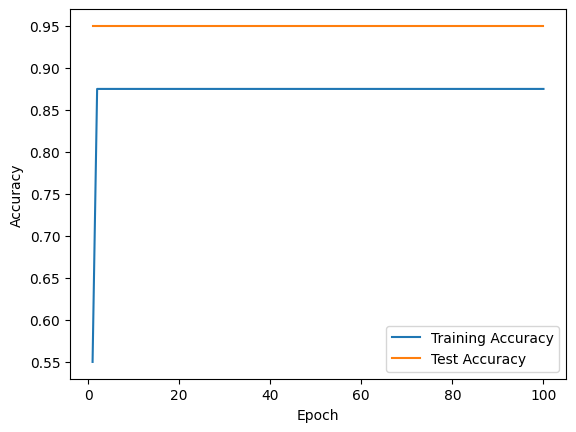

In [39]:
plt.plot(range(1, len(training_acc) + 1), training_acc, label="Training Accuracy")
plt.plot(range(1, len(test_acc) + 1), test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
len(training_acc), len(test_acc)

(100, 100)

In [41]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


In [42]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, prd_data)*100

95.0

In [45]:
accuracy_score(y_train, prd_data1)*100

87.5